# Text Analysis from SICSS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Install-packages" data-toc-modified-id="Install-packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Install packages</a></span></li><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load packages</a></span></li></ul></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-data-format" data-toc-modified-id="Look-at-the-data-format-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Look at the data format</a></span></li><li><span><a href="#Look-at-individual-column-values" data-toc-modified-id="Look-at-individual-column-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Look at individual column values</a></span></li><li><span><a href="#Convert-timestamps" data-toc-modified-id="Convert-timestamps-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convert timestamps</a></span></li></ul></li><li><span><a href="#Format-and-clean-the-text" data-toc-modified-id="Format-and-clean-the-text-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Format and clean the text</a></span><ul class="toc-item"><li><span><a href="#Filter-out-retweets-and-replace-urls" data-toc-modified-id="Filter-out-retweets-and-replace-urls-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Filter out retweets and replace urls</a></span></li><li><span><a href="#Tokenize-the-data" data-toc-modified-id="Tokenize-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tokenize the data</a></span></li><li><span><a href="#Convert-to-lowercase" data-toc-modified-id="Convert-to-lowercase-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert to lowercase</a></span></li><li><span><a href="#Remove-punctuation" data-toc-modified-id="Remove-punctuation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Remove punctuation</a></span></li><li><span><a href="#Remove-stopwords" data-toc-modified-id="Remove-stopwords-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Remove stopwords</a></span></li><li><span><a href="#Remove-numbers" data-toc-modified-id="Remove-numbers-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Remove numbers</a></span></li><li><span><a href="#Remove-extra-white-spaces" data-toc-modified-id="Remove-extra-white-spaces-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Remove extra white spaces</a></span></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Stemming</a></span></li></ul></li><li><span><a href="#Word-counting" data-toc-modified-id="Word-counting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word counting</a></span><ul class="toc-item"><li><span><a href="#Visualize-word-frequencies" data-toc-modified-id="Visualize-word-frequencies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualize word frequencies</a></span></li><li><span><a href="#WordClouds" data-toc-modified-id="WordClouds-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>WordClouds</a></span></li><li><span><a href="#Bigrams-and-n-grams" data-toc-modified-id="Bigrams-and-n-grams-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Bigrams and n-grams</a></span></li><li><span><a href="#tf-idf:-Term-Frequency-Inverse-Document-Frequency" data-toc-modified-id="tf-idf:-Term-Frequency-Inverse-Document-Frequency-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>tf-idf: Term Frequency Inverse Document Frequency</a></span></li></ul></li><li><span><a href="#Dictionary-based-text-analysis" data-toc-modified-id="Dictionary-based-text-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dictionary-based text analysis</a></span><ul class="toc-item"><li><span><a href="#Selecting-for-a-collection-of-words" data-toc-modified-id="Selecting-for-a-collection-of-words-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Selecting for a collection of words</a></span></li><li><span><a href="#Sentiment-analysis" data-toc-modified-id="Sentiment-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sentiment analysis</a></span><ul class="toc-item"><li><span><a href="#Select-a-dictionary" data-toc-modified-id="Select-a-dictionary-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Select a dictionary</a></span></li><li><span><a href="#Label-tweets-by-sentiment" data-toc-modified-id="Label-tweets-by-sentiment-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Label tweets by sentiment</a></span></li><li><span><a href="#Validate-sentiment-labels" data-toc-modified-id="Validate-sentiment-labels-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Validate sentiment labels</a></span></li><li><span><a href="#Linear-model-for-favorites-based-on-sentiment-count" data-toc-modified-id="Linear-model-for-favorites-based-on-sentiment-count-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Linear model for favorites based on sentiment count</a></span></li></ul></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

We will step through loading and cleaning a collection of Trump tweets from 2017-2018 for text analysis. In this session, we will look at word counting and dictionary-based text analysis methods like sentiment analysis.

<img src="imgs/textanalysis_diagrams.001.png" alt="Sentiment analysis flow diagram" width="600"/>


___Some operational details:___

This session is a [Binder](https://mybinder.org/) instance of a [Jupyter notebook](https://jupyter.org/) 

To run a code block, click the gray box and press shift+enter. After running a block, the cursor will automatically advance to the next block.

The binder session will time out after a period of inactivity. If this happens, you will need to restart the binder. Reloading the current page will not work. 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/MindyChang/text-analysis-workshop/master?filepath=index.ipynb)


## Setup 
### Install packages

We only need to install packages once - they have already been installed in this binder.
- *tidyverse*
    - *dyplr* for dataframe manipulation
    - *tidyr* for formatting into tidy data
    - *ggplot2* for plotting
    - *lubridate* for working with dates and times
- *tidytext* for getting text data into a tidy format
- *SnowballC* for getting word stems
- *stringr* for manipulating strings
- *wordcloud* for generating word clouds

In the R console, 
```
install.packages("tidyverse")
install.packages("tidytext")
install.packages("SnowballC")
install.packages("stringr")
install.packages("wordcloud")
```

### Load packages

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(tidytext)
library(SnowballC)
library(stringr)
library(wordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: RColorBrewer



## Load the data


<img src="imgs/textanalysis_diagrams.002.png" alt="Sentiment analysis flow diagram" width="600"/>


We will look at Trump's tweets collected between 2017-02-05 and 2018-05-18, which has already been extracted via the twitter API using the `rtweet` package and saved as a Rdata file. 

In [3]:
load(url("https://cbail.github.io/Trump_Tweets.Rdata"))

### Look at the data format
Preview the data we loaded, which is named `trumptweets` and formatted as a `dataframe`.

The `head()`function returns a the first few rows of `trumptweets`. 

You can change the number in 
`head(trumptweets, #) `
for the number of rows you want to see.

- `created_at` contains the timestamp of the tweet

- `text` contains the tweet

In [4]:
# preview trumptweets
head(trumptweets,5)

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,⋯,retweet_text,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>
997577906007298048,2018-05-18 20:41:21,25073877,realDonaldTrump,"Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” When the UN does more to solve conflicts around the world, it means the U.S. has less to do and we save money. @NikkiHaley is doing a fantastic job! https://t.co/pqUv6cyH2z",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997573139663028224,2018-05-18 20:22:25,25073877,realDonaldTrump,America is a Nation that believes in the power of redemption. America is a Nation that believes in second chances - and America is a Nation that believes that the best is always yet to come! #PrisonReform https://t.co/Yk5UJUYgHN,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997568208369577985,2018-05-18 20:02:49,25073877,realDonaldTrump,RT @SteveForbesCEO: .@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middl…,Twitter for iPhone,NA,NA,NA,FALSE,⋯,".@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middlemen like Pharmacy Benefit Managers, insurers &amp; hospitals would do well by passing discounts on to patients. @SecAzar @SGottliebFDA https://t.co/mfRQ5COtev",NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997515759281680385,2018-05-18 16:34:24,25073877,realDonaldTrump,"We grieve for the terrible loss of life, and send our support and love to everyone affected by this horrible attack in Texas. To the students, families, teachers and personnel at Santa Fe High School – we are with you in this tragic hour, and we will be with you forever... https://t.co/LtJ0D29Hsv",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997493407097524224,2018-05-18 15:05:35,25073877,realDonaldTrump,School shooting in Texas. Early reports not looking good. God bless all!,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"


### Look at individual column values
The `names()` function lists the column names


The `select()` function lets us select which columns we want to output

The pipe operation `%>%` provides an elegant way to sequentially pass the data through different operations.

In [5]:
# print column names
names(trumptweets)
# display selected columns
trumptweets %>%
  select('created_at', 'text', 'favorite_count','source') %>%
    head

[1] "status_id"              "created_at"             "user_id"               
 [4] "screen_name"            "text"                   "source"                
 [7] "reply_to_status_id"     "reply_to_user_id"       "reply_to_screen_name"  
[10] "is_quote"               "is_retweet"             "favorite_count"        
[13] "retweet_count"          "hashtags"               "symbols"               
[16] "urls_url"               "urls_t.co"              "urls_expanded_url"     
[19] "media_url"              "media_t.co"             "media_expanded_url"    
[22] "media_type"             "ext_media_url"          "ext_media_t.co"        
[25] "ext_media_expanded_url" "ext_media_type"         "mentions_user_id"      
[28] "mentions_screen_name"   "lang"                   "quoted_status_id"      
[31] "quoted_text"            "retweet_status_id"      "retweet_text"          
[34] "place_url"              "place_name"             "place_full_name"       
[37] "place_type"             "country"                "country_code"          
[40] "geo_coords"             "coords_coords"          "bbox_coords"

created_at,text,favorite_count,source
<dttm>,<chr>,<int>,<chr>
2018-05-18 20:41:21,"Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” When the UN does more to solve conflicts around the world, it means the U.S. has less to do and we save money. @NikkiHaley is doing a fantastic job! https://t.co/pqUv6cyH2z",4550,Twitter for iPhone
2018-05-18 20:22:25,America is a Nation that believes in the power of redemption. America is a Nation that believes in second chances - and America is a Nation that believes that the best is always yet to come! #PrisonReform https://t.co/Yk5UJUYgHN,10450,Twitter for iPhone
2018-05-18 20:02:49,RT @SteveForbesCEO: .@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middl…,0,Twitter for iPhone
2018-05-18 16:34:24,"We grieve for the terrible loss of life, and send our support and love to everyone affected by this horrible attack in Texas. To the students, families, teachers and personnel at Santa Fe High School – we are with you in this tragic hour, and we will be with you forever... https://t.co/LtJ0D29Hsv",40709,Twitter for iPhone
2018-05-18 15:05:35,School shooting in Texas. Early reports not looking good. God bless all!,66378,Twitter for iPhone
2018-05-18 13:50:11,"Reports are there was indeed at least one FBI representative implanted, for political purposes, into my campaign for president. It took place very early on, and long before the phony Russia Hoax became a “hot” Fake News story. If true - all time biggest political scandal!",55306,Twitter for iPhone


The `$` operation selects a column like this: `[tablename]$[columnname]`

We can apply different operations to columns. Some example operations include:

| operation   | Description |                      
|-------------|-------------|
| `min`       | minimum     |
| `max`       | maximum     | 
| `nrow`      | # rows      | 
| `ncol`      | # columns   | 
| `unique`    | list of unique values  | 
| `n_distinct`| # unique values     | 
| `mean`| mean    | 
| `median`| median     | 
| `sd`| standard dev    | 

In [6]:
# print summary information on individual columns
min(trumptweets$created_at)
max(trumptweets$created_at)
unique(trumptweets$country)
print(paste('# of rows: ', nrow(trumptweets)))


[1] "2017-02-05 22:49:42 UTC"

[1] "2018-05-18 20:41:21 UTC"

[1] NA                            "Republic of the Philippines"
[3] "United States"               "Vietnam"                    
[5] "Italy"                       "Belgium"                    
[7] "Kingdom of Saudi Arabia"

[1] "# of rows:  3196"


### Convert timestamps 
This will make it easier to select tweets by a specific date or timestamp

The assignment operator `<-` assigns the value of a variable, with `[variable] <- [value]`

In [7]:
# convert timestamps to timestamp format
trumptweets$created_at <- ymd_hms(trumptweets$created_at)

## examples: 
# trumptweets[as.Date(trumptweets$created_at) == as.Date("2018-05-18"),]
# trumptweets[trumptweets$created_at == ymd_hms("2017-05-05 19:43:37"),]

## Format and clean the text

<img src="imgs/textanalysis_diagrams.003.png" alt="Sentiment analysis flow diagram" width="600"/>


### Filter out retweets and replace urls
The `filter()` function selects for rows that fit the specified criteria.

The `mutate()` function specifies how to overwrite or create a new column based on existing columns.

The `str_replace_all()` function finds strings that match the specified criteria and replaces each one. Below, we are finding all strings that look like urls and replacing them with the string "url".

A Regular expression, or regex, is sequence of characters that define a search pattern. GREP, which stands for “Globally search a Regular Expression and Print”, is a useful function for searching through text. Here a [useful cheatsheet](https://rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf) for creating a regex. 

In [8]:
# filter out retweets, find urls and replace them with the string "url"
# regex for parsing tweets
replace_reg <- "https?://[^\\s]+|&amp;|&lt;|&gt;|\bRT\\b"
trumptweets <- trumptweets %>%
  filter(is_retweet == FALSE) %>%
  mutate(text = str_replace_all(text, replace_reg, "url"))


### Tokenize the data

**Tokenization** - the way you define a unit of analysis (e.g. words, sequence of words, sentence)

**Document** - a unit of context (in this case - a single tweet)

**Tidy text format** - One row per token (word in this case) with column variables that have extra context (e.g. which document the word came from)

The `unnest_tokens()` function separates the tweets into a tidy text format using the token specified. Here we are defining a token as a single word.



In [9]:
tidy_trump_tweets<- trumptweets %>%
    select(created_at,text) %>%
    unnest_tokens("word", text)

head(tidy_trump_tweets)


created_at,word
<dttm>,<chr>
2018-05-18 20:41:21,just
2018-05-18 20:41:21,met
2018-05-18 20:41:21,with
2018-05-18 20:41:21,un
2018-05-18 20:41:21,secretary
2018-05-18 20:41:21,general


### Convert to lowercase
Done automatically by `unnest_tokens` from `tidytext`

### Remove punctuation
Done automatically by `unnest_tokens` from `tidytext`

### Remove stopwords
Common words such as “the”, “and”, “for”, “is”, etc. are often described as “stop words,” meaning that they should not be included in a text analysis. The `tidytext` package has a list of common stop words called `stop_words` that we can use. There are also some words specific to tweets that we would like to filter out, for example urls, "rt" for retweets, "t.co" for twitter link shortening, and "amp" for accelerated mobile pages.

In [19]:
# load stop_words from tidytext package and remove them from tidy_trump_tweets

#load stop_words
data("stop_words")
# add a few more stop words
custom_stop_words <- stop_words %>%
    bind_rows(tibble(word = c("url","rt","t.co","amp"),
                     lexicon = "custom"))

# remove stopwords and other insignificant words from tidy_trump_tweets
tidy_trump_tweets <-
   tidy_trump_tweets %>%
      anti_join(custom_stop_words) 
head(tidy_trump_tweets)

Joining, by = "word"



created_at,word
<dttm>,<chr>
2018-05-18 20:41:21,met
2018-05-18 20:41:21,secretary
2018-05-18 20:41:21,antónio
2018-05-18 20:41:21,guterres
2018-05-18 20:41:21,hard
2018-05-18 20:41:21,united


Note: We might need to go back and edit our stopwords that have alternative meanings, for example:
- `tidytext` automatically converted all words to lowercase, and removed "UN" 
- `tidytext` automatically removed punctuation, and "Secretary-General" was reduced to only "secretary".

### Remove numbers

In [ ]:
# remove numbers from tidy_trump_tweets
tidy_trump_tweets<-tidy_trump_tweets[-grep("\\b\\d+\\b", tidy_trump_tweets$word),]

### Remove extra white spaces

In [ ]:
# remove extra white spaces from tidy_trump_tweets
tidy_trump_tweets$word <- gsub("\\s+","",tidy_trump_tweets$word)

### Stemming
We may want to reduce all words to their word stems. For example: "unite", "united", "uniting", "unites" all reduce to unit. The code below shows how to do it, but we won't use it for now.

In [ ]:
# get word stems and save as tidy_trump_tweets_stemmed
tidy_trump_tweets_stemmed<-tidy_trump_tweets %>%
      mutate_at("word", list(~wordStem((.), language="en")))
head(tidy_trump_tweets_stemmed)

## Word counting 
Count the most commonly used words across tweets and plot them 

<img src="imgs/textanalysis_diagrams.004.png" alt="Sentiment analysis flow diagram" width="600"/>


In [ ]:
# count word frequencies and sort in descending order
top_words<-
   tidy_trump_tweets %>%
    count(word) %>%
        arrange(desc(n))
head(top_words)

### Visualize word frequencies
<img src="imgs/textanalysis_diagrams.005.png" alt="Sentiment analysis flow diagram" width="600"/>

Plot bar charts of word frequencies using `ggplot` from `ggplot2` package

In [ ]:
# plot the 20 most frequently used words
# function for bar plots given a dataframe with columns [word,n]
plot_frequent_words <- function(word_counts) {
    word_counts %>%
        ggplot(aes(x=n, y=reorder(word, n), fill=-n))+
          geom_bar(stat="identity")+
            theme_minimal()+
            theme(axis.text.x = element_text(angle = 60, hjust = 1, size=15),
                  axis.text.y = element_text(hjust = 1, size=15),
                  axis.title = element_text(size=15),
                  plot.title = element_text(hjust = 0.5, size=18))+
                ylab("Frequency")+
                xlab("# Occurences")+
                ggtitle("Most Frequent Words in Trump Tweets")+
                guides(fill=FALSE)
}

top_words %>%
  slice(1:20) %>%
    plot_frequent_words()

### WordClouds
Create wordclouds for qualitative insights using the `wordcloud` function from the `wordcloud` package
- `min.freq`: words with frequency below min.freq will not be plotted
- `max.words`: Maximum number of words to be plotted. Least frequent terms are dropped
- `random.order`: plot words in random order. If false, they will be plotted in decreasing frequency
- `rot.per`: proportion words with 90 degree rotation
- `colors`: color words from least to most frequent
    - choose other color themes from [RColorBrewer](https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html)

In [ ]:
# generate a wordcloud 
set.seed(1234) # for reproducibility 
wordcloud(words = top_words$word, freq = top_words$n, min.freq = 1,  
          max.words=200, random.order=FALSE, rot.per=0.3,colors=brewer.pal(8, "Dark2"))

### Bigrams and n-grams

Bigrams and n-grams refer to how text is tokenized, or the size of the unit of analysis.

Unigrams are single words, bigrams are two-word phrases, and n-grams are n-word phrases.


In [ ]:
# Preprocess trumptweets by tokenizing into bigrams, removing stopwords from individual words,
# and then combining back together
tidy_bigrams <-trumptweets %>%
    select(created_at,text) %>%
        unnest_tokens(output=word, input=text, token = "ngrams", n = 2) %>% 
          separate(word, c("word1", "word2"), sep = " ") %>% 
              filter(!word1 %in% custom_stop_words$word) %>%
              filter(!word2 %in% custom_stop_words$word) %>% 
                  unite(word,word1, word2, sep = " ")

# count bigrams and arrange by frequency
top_bigrams <- tidy_bigrams %>%
    count(word) %>%
        arrange(desc(n))

# plot top bigrams
top_bigrams %>%
  slice(1:20) %>%
    plot_frequent_words()

### tf-idf: Term Frequency Inverse Document Frequency
A statistic for how important a word is to a document in a collection

Words that occur more frequently in one document (tweet) and less frequently in other documents should be given more importance as they are more useful for classification.

***Term frequency***

$tf(term)=\displaystyle(\frac{n_{occurences\ of\ term\ in\ document}}{n_{words\ in\ document}})$

***Inverse document Frequency:***

$idf(term)=\displaystyle log(\frac{n_{documents}}{n_{documents\ containing\ term}})$

The `bind_tf_idf` function from the `tidytext` package calculates the tf-idf value for each token (word)

In [ ]:
tidy_trump_tfidf <- tidy_trump_tweets %>%
    count(word, created_at) %>%
        bind_tf_idf(word, created_at, n) %>%
            arrange(desc(tf_idf)) %>%
                distinct(word,.keep_all = TRUE)

In [ ]:
set.seed(1234) # for reproducibility     
wordcloud(words = tidy_trump_tfidf$word, freq = tidy_trump_tfidf$tf_idf, min.freq = .5,  
          max.words=100, random.order=FALSE, rot.per=0.3,colors=brewer.pal(8, "Dark2"),scale=c(2,.5) )

## Dictionary-based text analysis

<img src="imgs/textanalysis_diagrams.006.png" alt="Sentiment analysis flow diagram" width="600"/>


### Selecting for a collection of words
We can create a custom list of words and find tweets that contain any of those words

The `str_detect` function from `stringr` package finds all text that contains a specified string.

In [ ]:
# create a list of words as our custom dictionary
custom_dictionary<-c("economy","unemployment","trade","tariffs","jobs")

In [ ]:
# extract tweets that contain any words from our custom dictionary
custom_dictionary_tweets<-trumptweets[str_detect(trumptweets$text, 
                                                regex(paste(custom_dictionary, collapse="|"),
                                                      ignore_case=TRUE)),]
custom_dictionary_tweets

In [ ]:
# plot a wordcloud for our tweets that match our custom dictionary
custom_top_words<-custom_dictionary_tweets %>%
    select(created_at,text) %>%
      unnest_tokens("word", text) %>%
        anti_join(custom_stop_words) %>%
            count(word) %>%
                arrange(desc(n))

#plot wordcloud
set.seed(1234) # for reproducibility 
wordcloud(words = custom_top_words$word, freq = custom_top_words$n, min.freq = 1,  
          max.words=100, random.order=FALSE, rot.per=0.35,colors=brewer.pal(8, "Dark2"),scale=c(4,1))

### Sentiment analysis
One popular type of dictionary is a sentiment dictionary which can be used to assess the valence of a given text by searching for words that describe affect or opinion. 


#### Select a dictionary


`tidytext` has a few built-in sentiment dictionaries
- `afinn` - sentiment words in twitter discussions of climate change (value between -5 and 5)
- `bing` - sentiment words identified in online forums (negative vs positive)
- `nrc` - emotional valence words labeled by mturk workers
    - Words in this dictionary are labeled with the sentiments:
    "negative","positive","trust","fear","sadness","anger", "surprise","disgust","joy","anticipation"
    - Each word can be associated with multiple sentiments


In [45]:
# look at the nrc dictionary
sentiment_dictionary = "bing"
head(get_sentiments(sentiment_dictionary))

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


#### Label tweets by sentiment
We use the `inner_join` function to count the number of words that reflect each type of sentiment for a given tweet

In [46]:
# count the number of sentiment words for each tweet
trump_tweet_sentiment <- tidy_trump_tweets %>%
  inner_join(get_sentiments(sentiment_dictionary)) %>%
    count(created_at, sentiment) 
head(trump_tweet_sentiment)


Joining, by = "word"



created_at,sentiment,n
<dttm>,<chr>,<int>
2017-02-05 22:49:42,positive,1
2017-02-06 03:36:54,positive,4
2017-02-06 12:01:53,negative,2
2017-02-06 12:07:55,negative,2
2017-02-06 16:32:24,negative,3
2017-02-06 23:33:52,positive,2


In [47]:
# group sentiment counts by tweet
trump_sentiment_spread <-trump_tweet_sentiment %>%
  spread(sentiment, n, fill=0)

# add in the original text and favorite count
trump_sentiment_full <- merge(trump_sentiment_spread, 
                              trumptweets[c("created_at","text","favorite_count")], 
                              by="created_at")
head(trump_sentiment_full)

,created_at,negative,positive,text,favorite_count
,<dttm>,<dbl>,<dbl>,<chr>,<int>
1,2017-02-05 22:49:42,0,1,Enjoy the #SuperBowl and then we continue: MAKE AMERICA GREAT AGAIN!,178303
2,2017-02-06 03:36:54,0,4,"What an amazing comeback and win by the Patriots. Tom Brady, Bob Kraft and Coach B are total winners. Wow!",257578
3,2017-02-06 12:01:53,2,0,"Any negative polls are fake news, just like the CNN, ABC, NBC polls in the election. Sorry, people want border security and extreme vetting.",154968
4,2017-02-06 12:07:55,2,0,"I call my own shots, largely based on an accumulation of data, and everyone knows it. Some FAKE NEWS media, in order to marginalize, lies!",119843
5,2017-02-06 16:32:24,3,0,"The failing @nytimes writes total fiction concerning me. They have gotten it wrong for two years, and now are making up stories url sources!",92262
6,2017-02-06 23:33:52,0,2,An extended interview from the Super Bowl with @oreillyfactor airs tonight at 8:00 P.M. Enjoy! url,51294


#### Validate sentiment labels
Let's see what the tweets with the highest counts for each sentiment look like.

In [48]:
# for each sentiment, print a tweet with the highest count for that sentiment
sentiments <- as.list(get_sentiments(sentiment_dictionary) 
                      %>% distinct(sentiment))

high_sentiments <- trump_sentiment_full[FALSE,] 

high_sentiments$highest <- NULL 
for (s in sentiments[[1]])
{
    tmp <- trump_sentiment_full %>% 
            arrange(desc(get(s)))
    tmp$highest <- s
    high_sentiments <- high_sentiments %>%
        bind_rows(tmp[1,])
}
high_sentiments <- high_sentiments %>%
    select(-one_of('created_at', 'favorite_count'))
high_sentiments

negative,positive,text,highest
<dbl>,<dbl>,<chr>,<chr>
8,2,"Thank you to Sue Kruczek, who lost her wonderful and talented son Nick to the Opioid scourge, for your kind words while on @foxandfriends. We are fighting this terrible epidemic hard - Nick will not have died in vain!",negative
0,10,"Congratulations to Patrick Reed on his great and courageous MASTERS win! When Patrick had his amazing win at Doral 5 years ago, people saw his great talent, and a bright future ahead. Now he is the Masters Champion!",positive


[1] "negative"


Joining, by = "word"

Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on 'don’t' in 'mbcsToSbcs': dot substituted for <99>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset 

[1] "positive"


Joining, by = "word"



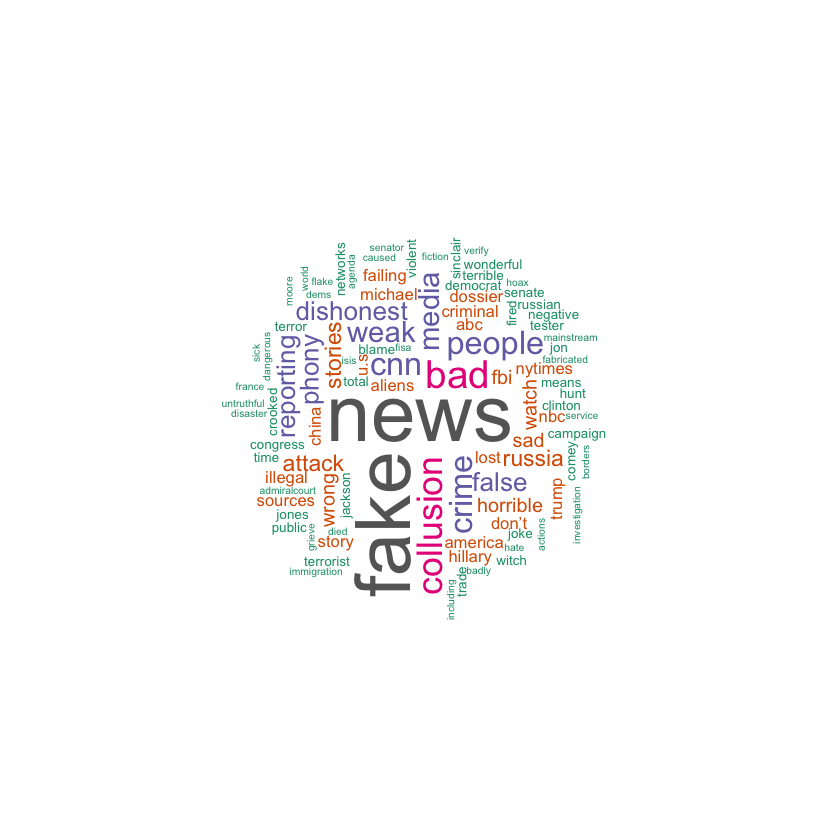

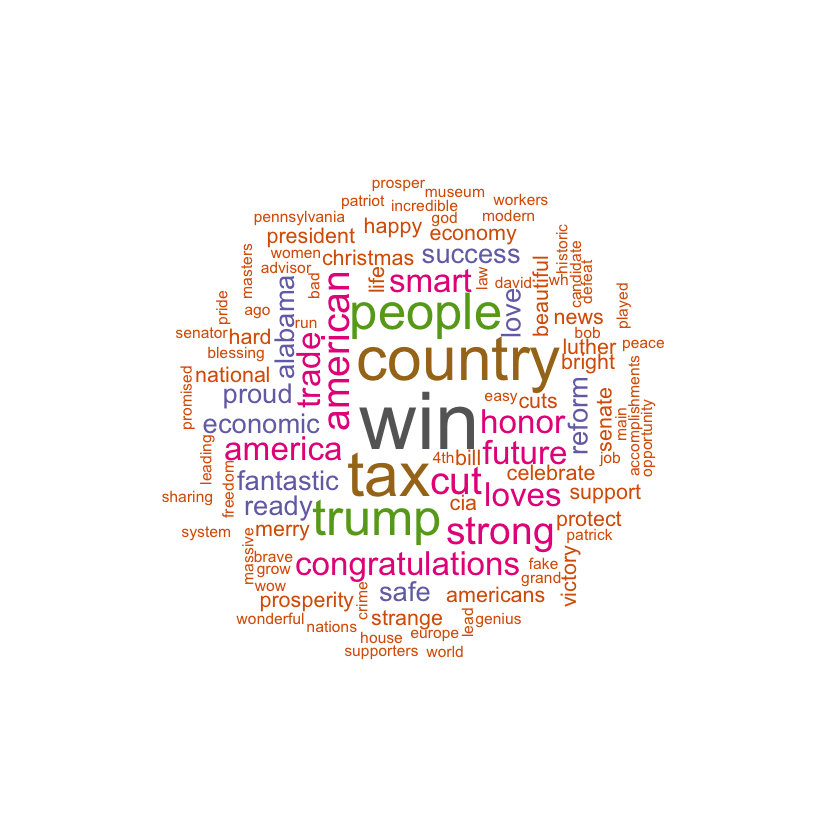

In [50]:
# generate word clouds for the top 50 most negative and top 50 most positive tweets
for (s in c("negative","positive"))
{
    print(s)
    top_words <- trump_sentiment_full %>% 
        arrange(desc(get(s))) %>%
        slice(1:50) %>%
        select(created_at,text) %>%
          unnest_tokens("word", text) %>%
            anti_join(custom_stop_words) %>%
                count(word) %>%
                    arrange(desc(n))

    #plot wordcloud
    set.seed(1234) # for reproducibility 
    wordcloud(words = top_words$word, freq = top_words$n, min.freq = 2,  
              max.words=100, random.order=FALSE, rot.per=0.3,colors=brewer.pal(8, "Dark2"),scale=c(4,.2))

}

#### Linear model for favorites based on sentiment count

In [ ]:
model1 <-trump_sentiment_full %>%
  lm(data=., favorite_count ~ disgust + negative + joy + anticipation + positive + sadness + trust + fear)
summary(model1)

## Appendix